<a href="https://colab.research.google.com/github/engineerjkk/DeepLearning_from_Scratch/blob/main/conv_and_pooling_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from termcolor import colored

In [7]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D

In [8]:
def p_color(input_string,input_object):
  print(colored(input_string+':','magenta'))
  print(colored('shape: ','cyan'),input_object.shape,'\n')

In [4]:
import cv2
import matplotlib.pyplot as plt


In [11]:
test_image=tf.random.normal(mean=0,stddev=1,shape=(1,50,50,1))

50 by 50의 그레이 스케일 이미지를 생성

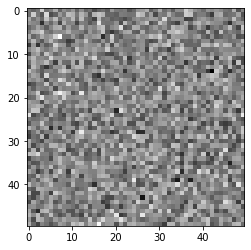

In [13]:
cv2.cvtColor( test_image.numpy().squeeze(), cv2.COLOR_BGR2RGB)
plt.imshow( test_image.numpy().squeeze(),cmap='gray')

필터는 1개, 패딩은 vaild를 제공합니다. 
- padding : 경계 처리 방법을 정의합니다.
- ‘valid’ : 유효한 영역만 출력이 됩니다. 따라서 출력 이미지 사이즈는 입력 사이즈보다 작습니다.

In [14]:
conv=Conv2D(filters=1,kernel_size=3,strides=1,padding='valid')
conved=conv(test_image)

p_color('input',test_image)
p_color('after conv',conved)

input:
shape:  (1, 50, 50, 1) 

after conv:
shape:  (1, 48, 48, 1) 



컨불루션을 거친 후 사이즈가 48 by 48 이 됐습니다.

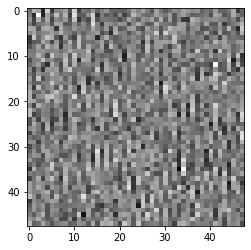

In [16]:
cv2.cvtColor( conved.numpy().squeeze(), cv2.COLOR_BGR2RGB)
plt.imshow( conved.numpy().squeeze(),cmap='gray')

- 3,3,1,1 에서 3by3을 의미하며, 세번 째 1은 채널 수를, 네 번째 1은 filter의 개수를 말한다. 
- 즉 만약 3,3,3,1로 바꿔말하면 3by3에 3채널짜리 필터 1개가 있다는 뜻이된다.

In [17]:
p_color('conv weight',conv.get_weights()[0])#weight
p_color('conv bias',conv.get_weights()[1]) #bias

conv weight:
shape:  (3, 3, 1, 1) 

conv bias:
shape:  (1,) 



이번엔 필터 8개로 구성해보겠습니다. 그 덕분에 bias 역시 8개가 됩니다.

In [18]:
conv=Conv2D(filters=8,kernel_size=3,strides=1,padding='valid')
conved=conv(test_image)
p_color('conv weight',conv.get_weights()[0])#weight
p_color('conv bias',conv.get_weights()[1]) #bias

conv weight:
shape:  (3, 3, 1, 8) 

conv bias:
shape:  (8,) 



- 8개의 필터를 거쳤으므로 8개의 필터가 생성됨을 볼 수 있습니다.
- 여기서 앞의 1은 배치사이즈입니다. 즉, 배치사이즈는 인풋의 개수입니다.

In [21]:
p_color('after conv',conved)

after conv:
shape:  (1, 48, 48, 8) 



In [ ]:
# %%

# MAX Pooling 테스트
- 먼저 4by4의 테스트 이미지를 랜덤으로 생성합니다.

In [22]:
test_image=tf.random.normal(mean=0,stddev=1,shape=(1,4,4,1))
maxpool=MaxPooling2D(pool_size=2,strides=2)
maxpooled=maxpool(test_image)

p_color('input',test_image)
p_color('after maxpool',maxpooled)

input:
shape:  (1, 4, 4, 1) 

after maxpool:
shape:  (1, 2, 2, 1) 



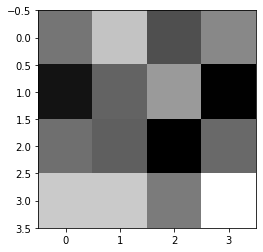

In [23]:
cv2.cvtColor( test_image.numpy().squeeze(), cv2.COLOR_BGR2RGB)
plt.imshow( test_image.numpy().squeeze(),cmap='gray')

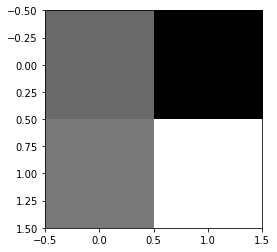

In [24]:
cv2.cvtColor( maxpooled.numpy().squeeze(), cv2.COLOR_BGR2RGB)
plt.imshow( maxpooled.numpy().squeeze(),cmap='gray')

# Average Pooling 테스트

In [25]:
avgpool=AveragePooling2D(pool_size=2,strides=2)
avgpooled=avgpool(test_image)

p_color('input',test_image)
p_color('after maxpool',avgpooled)

input:
shape:  (1, 4, 4, 1) 

after maxpool:
shape:  (1, 2, 2, 1) 



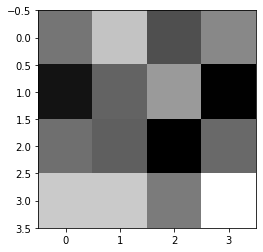

In [26]:
cv2.cvtColor( test_image.numpy().squeeze(), cv2.COLOR_BGR2RGB)
plt.imshow( test_image.numpy().squeeze(),cmap='gray')

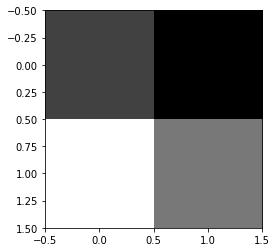

In [27]:
cv2.cvtColor( avgpooled.numpy().squeeze(), cv2.COLOR_BGR2RGB)
plt.imshow( avgpooled.numpy().squeeze(),cmap='gray')

# int 형으로 다시 테스트해봄

In [39]:
test_image=tf.random.uniform(minval=0,maxval=10,shape=(1,4,4,1),dtype=tf.int32)
maxpool=MaxPooling2D(pool_size=2,strides=1)
maxpooled=maxpool(test_image)

In [40]:
print(test_image.numpy().squeeze(),'\n')
print(maxpooled.numpy().squeeze(),'\n')

[[9 5 8 1]
 [7 7 3 0]
 [6 5 8 0]
 [8 5 3 6]] 

[[9 8 8]
 [7 8 8]
 [8 8 8]] 



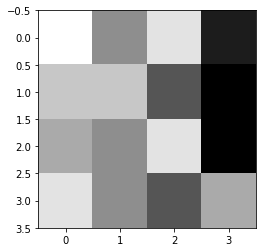

In [41]:
#cv2.cvtColor( test_image.numpy().squeeze(), cv2.COLOR_BGR2RGB)
plt.imshow( test_image.numpy().squeeze(),cmap='gray')

3행 1열에 검은색으로 보이는것은 상대적이라 그렇다? 

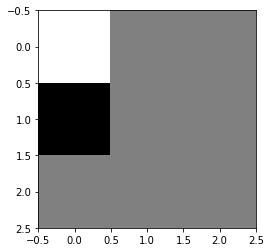

In [44]:
#cv2.cvtColor(maxpooled.numpy().squeeze(), cv2.COLOR_BGR2RGB)
plt.imshow(maxpooled.numpy().squeeze(),cmap='gray')

# 이제 3채널로 테스트 이미지 생성후 MAXPOOLING을 해보겠습니다.

In [45]:
test_image=tf.random.uniform(minval=0,maxval=10,shape=(1,4,4,3),dtype=tf.int32)
maxpool=MaxPooling2D(pool_size=2,strides=1)
maxpooled=maxpool(test_image)

# 3차원이므로 2D상의 디스플레이에서는 출력이되지 않습니다.

In [46]:
cv2.cvtColor( test_image.numpy().squeeze(), cv2.COLOR_BGR2RGB)
plt.imshow( test_image.numpy().squeeze(),cmap='gray')

error: ignored

# 따라서 채널을 각각 뽑아보겠습니다.

좌측 : test Image, 우측 : Maxpooled Image

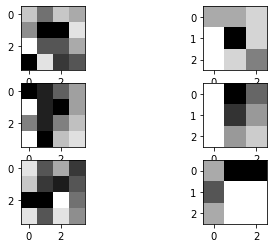

In [61]:
i=1
for channel_idx in range(3):
  #디지털 숫자값을 보고싶으면 주석해제
  #print('input_channel {}:\n'.format(channel_idx),test_image[...,channel_idx].numpy().squeeze())
  plt.subplot(3,2,i)
  i=i+1
  plt.imshow( test_image[...,channel_idx].numpy().squeeze(),cmap='gray')
  #print('maxpool_channel {}:\n'.format(channel_idx),maxpooled[...,channel_idx].numpy().squeeze())
  plt.subplot(3,2,i)
  plt.imshow( maxpooled[...,channel_idx].numpy().squeeze(),cmap='gray')
  i=i+1

# Flatten and Dense Layer

In [62]:
from tensorflow.keras.layers import Flatten, Dense

In [63]:
feature_map=tf.random.normal(mean=0,stddev=1,shape=(1,11,11,128)) ## 11 by 11 filter가 128개로 구성된 feature map이란 뜻이다. 

In [65]:
flatten=Flatten()
flattened=flatten(feature_map)

p_color('feature map',feature_map)
p_color('after flatten',flattened)# 1은 배치 사이즈이다.

feature map:
shape:  (1, 11, 11, 128) 

after flatten:
shape:  (1, 15488) 



flatten으로 get_weights()값을 확인하면 빈칸으로 되어있음을 확인할 수 있다.

In [66]:
print(flatten.get_weights())

[]


In [67]:
test_feature=tf.random.normal(mean=0,stddev=1,shape=(32,1024))

1024개의 노드가 있는 Layer가 32개의 인풋으로 들어간다는 뜻입니다.
- 하나의 배치가 1024개의 feature를 가지고 있다.

>

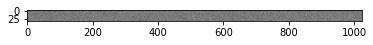

In [68]:
plt.imshow(test_feature.numpy().squeeze(),cmap='gray')

In [70]:
dense=Dense(units=64,activation='relu')
densed=dense(test_feature)

In [71]:
p_color('test_feature',test_feature)
p_color('after dense',densed)

test_feature:
shape:  (32, 1024) 

after dense:
shape:  (32, 64) 



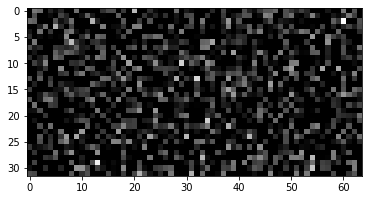

In [72]:
plt.imshow(densed.numpy().squeeze(),cmap='gray')

1024개의 weight가 있는 filter를 64개 넣는다.

In [73]:
print(dense.get_weights()[0].shape)

(1024, 64)


# weight와 bias에 대한 파라미터이므로 2개 가지고 있다.

In [74]:
print(len(dense.get_weights()))

2


# 전체 정리

In [94]:
test_image=tf.random.normal(mean=0,stddev=1,shape=(32,50,50,3))

In [95]:
conv=Conv2D(filters=8,kernel_size=(3,3),padding='same',activation='relu')

In [96]:
conv_pool=MaxPooling2D(pool_size=2,strides=2)

In [97]:
flatten=Flatten()

In [98]:
dense=Dense(units=10,activation='softmax')

In [100]:
p_color('inputs',test_image)
x=conv(test_image)
p_color('after conv',x)
x=conv_pool(x)
p_color('after conv_pool',x)

inputs:
shape:  (32, 50, 50, 3) 

after conv:
shape:  (32, 50, 50, 8) 

after conv_pool:
shape:  (32, 25, 25, 8) 



after flatten:
shape:  (32, 5000) 



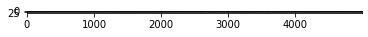

In [101]:
x=flatten(x)
p_color('after flatten',x)
plt.imshow(x.numpy().squeeze(),cmap='gray')

after dense:
shape:  (32, 10) 



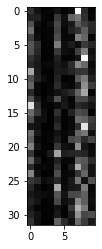

In [102]:
x=dense(x)
p_color('after dense',x)
plt.imshow(x.numpy().squeeze(),cmap='gray')

# Various Implementations of CNN

In [138]:
import tensorflow as tf
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Layer
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation
from tensorflow.keras.layers import Flatten,Dense

In [124]:
model=Sequential()

#feature extractor
model.add(Conv2D(filters=8,kernel_size=5,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Conv2D(filters=32,kernel_size=5,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))

In [125]:
#classifier
model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=10,activation='softmax'))

In [126]:
model.build(input_shape=(None,28,28,1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 8)         208       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 32)        6432      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                100416    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [129]:
# model sub-classing
class CNN_Model(Model):
  def __init(self):
    super(CNN_Model,self).__init__()

    #feature extractor
    self.conv1=Conv2D(filters=8,kernel_size=5,padding='same',activation='relu',name='conv1')
    self.conv1_pool=MaxPooling2D(pool_size=2,strides=2)
    self.conv2=Conv2D(filters=32,kernel_size=5,padding='same',activation='relu')
    self.conv2_pool=MaxPooling2D(pool_size=2,strides=2)

    #classifier
    self.flatten=Flatten()
    self.dense1=Dense(units=64,activation='relu')
    self.dense2=Dense(units=10,activation='softmax')

  def call(self,x):
    print(x.shape)
    x=self.conv1(x)
    x=self.conv1_pool(x)
    x=self.conv2(x)
    x=self.conv_pool(x)

    x=self.flatten(x)
    x=self.dense1(x)
    x=self.dense2(x)
    return x
model=CNN_Model()
model.build(input_shape=(None,28,28,1))
model.summary()

(None, 28, 28, 1)


AttributeError: ignored

In [130]:
model=Sequential()

#feature extractor
model.add(Conv2D(filters=8,kernel_size=5,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Conv2D(filters=32,kernel_size=5,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=10,activation='softmax'))
model.build(input_shape=(None,28,28,1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 8)         208       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 32)        6432      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                100416    
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [131]:
print(model.layers)

[<keras.layers.convolutional.Conv2D object at 0x7fc1f2a42950>, <keras.layers.pooling.MaxPooling2D object at 0x7fc1f2a42bd0>, <keras.layers.convolutional.Conv2D object at 0x7fc1f2a31cd0>, <keras.layers.pooling.MaxPooling2D object at 0x7fc1f2a2bad0>, <keras.layers.core.Flatten object at 0x7fc1f2a2bcd0>, <keras.layers.core.Dense object at 0x7fc1f2a2bc50>, <keras.layers.core.Dense object at 0x7fc1f690d6d0>]


In [132]:
print(len(model.layers))

7


각각 웨이트와 바이어스가 된다.

In [134]:
for layer in model.layers:
  if len(layer.get_weights()) !=0:
    w,b=layer.get_weights()
    print(w.shape,b.shape,'\n')

(5, 5, 1, 8) (8,) 

(5, 5, 8, 32) (32,) 

(1568, 64) (64,) 

(64, 10) (10,) 



In [137]:
class CNN_Model(Model):
  def __init__(self):
    super(CNN_Model,self).__init__()

    #feature extractor
    self.fe=Sequential(name='feature_extractor')
    self.fe.add(Conv2D(filters=8, kernel_size=5,padding='same',activation='relu'))
    self.fe.add(MaxPooling2D(pool_size=2,strides=2))
    self.fe.add(Conv2D(filters=32,kernel_size=5,padding='same',activation='relu'))
    self.fe.add(MaxPooling2D(pool_size=2,strides=2))
    
    #classifier
    self.classifier=Sequential(name='classifier')
    self.classifier.add(Flatten())
    self.classifier.add(Dense(units=64,activation='relu'))
    self.classifier.add(Dense(units=10,activation='softmax'))
  
  def call(self,x):
    x=self.fe(x)
    x=self.classifier(x)
    return x 

model=CNN_Model()
model.build(input_shape=(None,28,28,1))
model.summary()

Model: "cnn__model_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_6 (Sequential)    (None, 7, 7, 32)          6640      
_________________________________________________________________
sequential_7 (Sequential)    (None, 10)                101066    
Total params: 107,706
Trainable params: 107,706
Non-trainable params: 0
_________________________________________________________________


In [141]:
class ConvLayer(Layer):
  def __init__(selffilters):
    super(ConvLayer,self).__init__()
    self.conv=Conv2D(filters=filters,kernel_size=3,paddoing='same')
    self.conv_act=Activation('relu')
    self.conv_pool=MaxPooling2D(pool_size=2,strides=2)

  def call(self,x):
    x=self.conv(x)
    x=self.conv_act(x)
    x=self.conv_pool(x)
    return x

class CNN_Mode(Model):
  def __init__(self):
    super(CNN_Model,self).__init__()
    self.conv1=ConvLayer(8)
    self.conv2=ConvLayer(16)
    self.conv3=ConvLayer(32)
  
  def call(self,x):
    x=self.conv1(x)
    x=self.conv2(x)
    x=self.conv3(x)

    x=self.flatten(x)
    x=self.dense1(x)
    x=self.dense2(x)
    return x
  
model=CNN_Model()
model.build(input_shape=(None,28,28,1))
model.summary()

Model: "cnn__model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_10 (Sequential)   (None, 7, 7, 32)          6640      
_________________________________________________________________
sequential_11 (Sequential)   (None, 10)                101066    
Total params: 107,706
Trainable params: 107,706
Non-trainable params: 0
_________________________________________________________________
